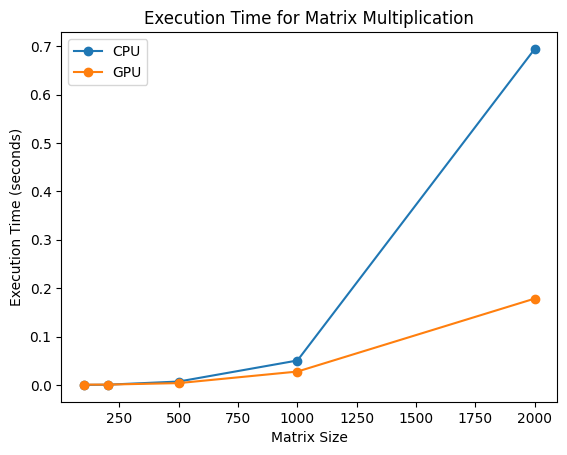

In [5]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time

sizes = [100, 200, 500, 1000, 2000]   # اندازه‌های مختلف ماتریس‌ها

cpu_times = []
gpu_times = []

for size in sizes:
    a_cpu = np.random.rand(size, size)
    b_cpu = np.random.rand(size, size)

    a_gpu = cp.asarray(a_cpu)
    b_gpu = cp.asarray(b_cpu)

    start_time = time.time()
    c_cpu = np.dot(a_cpu, b_cpu)
    end_time = time.time()

    cpu_times.append(end_time - start_time)

    start_time = time.time()
    c_gpu = cp.matmul(a_gpu, b_gpu)
    cp.cuda.Stream.null.synchronize()   # همگام‌سازی برای انتظار پایان اجرای تابع
    end_time = time.time()

    gpu_times.append(end_time - start_time)

plt.plot(sizes, cpu_times, marker='o', label='CPU')
plt.plot(sizes, gpu_times, marker='o', label='GPU')
plt.title('Execution Time for Matrix Multiplication')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.show()